In [1]:
#import needed libraries
import numpy as np #for numerical operations
import pandas as pd #for file operations
import matplotlib.pyplot as plt #for plotting graphs
import seaborn as sns #also for plotting graphs
from sklearn.linear_model import LinearRegression #for machine learning 
from sklearn import metrics #for testing the machine learning model

In [2]:
# Importing the dataset
dataset = pd.read_csv('total-precipitation-Japanweather1.csv')

In [3]:
dataset.head() #show the first 5 rows of the dataset

,year,solar_radiation,mean_relative_humidity,mean_air_temperature,mean_wind_speed,total_sunshine_duration,percentage_possible_sunshine,total_precipitation
0,Jan-10,9.1,67,16.8,5.0,92.7,28,90.0
1,Feb-10,9.2,77,18.3,5.6,69.5,22,276.5
2,Mar-10,14.2,71,19.9,5.8,134.9,36,41.5
3,Apr-10,13.4,76,21.2,5.4,81.3,21,219.0
4,May-10,14.8,79,23.8,5.1,111.8,27,574.5


In [4]:
X = dataset.iloc[:, 1:-1].values #select All rows, all columns excluding the first and the last column
y = dataset.iloc[:, -1].values #select All rows, last column

#dates = X[:,0]
dates = dataset.iloc[:,0] #store the dates from the dataset (first column) in a variable, to be used when plotting graphs

In [5]:
#train a linear regression model on the data
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [6]:
#find the coefficient of determination to see how well the model performs
r_sq = model.score(X, y)
print('coefficient of determination: ', r_sq)

coefficient of determination:  0.5583032062934818


In [7]:
y_pred = model.predict(X) #using the trained model, try to predict outcomes
print('predicted response: ', y_pred, sep='\n') #display predictions

predicted response: 
[ 79.93839922 248.3968812  144.30364291 290.13156278 298.28643281
 363.07181434 369.26765458 278.06466719 156.05141723 269.75250911
 140.91180712  33.2021425  131.4886774   74.25446365  94.22651509
   7.73642304 411.81189044 344.33790468 199.26122766 278.12324468
 198.5518447  284.82229369 332.80942898 204.24992996 201.78184817
 219.80690168 145.41830961 262.41094671 241.66662627 425.91166521
 194.54245439 370.54963994 253.14967069 171.46239246  96.80302328
 133.18664907  94.13652097 108.85351691  99.73276796 219.68180391
 318.61656993 220.59442447  91.73842121 136.91919575 200.16366137
 324.16137059 102.01965215  92.9515485  -67.28158018 173.59194743
 136.13272914 126.25949365 299.56844137 357.85154621 254.70445659
 269.83769786  98.91459285 203.74090293 118.02426667 106.80770621
  53.99383685   7.91094266 116.81012797 212.09459225 259.51731031
 260.548945   300.20340609 305.33142932 109.58292867 108.24861469
 139.74994221 146.9672387  163.91053512 128.46337329 12

In [8]:
#model evauluation metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

Mean Absolute Error: 68.99297827279321
Mean Squared Error: 8302.576809112003
Root Mean Squared Error: 91.11847677124548


Text(0.5, 1.0, 'Total precipitation - actual and predicted values')

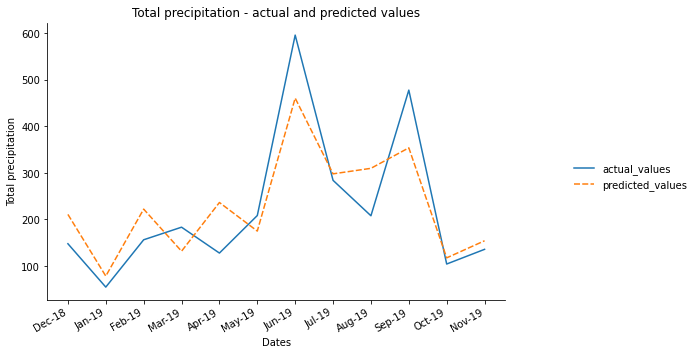

In [9]:
df = pd.DataFrame(dict(actual_values=y[-13:-1], predicted_values=y_pred[-13:-1]), index=dates[-13:-1]) #create a dataframe containing the last 12 actual and predicted values with the month and year as the index of the dataframe
g = sns.relplot(kind="line", data=df) #plot a line graph using the dataframe
g.fig.autofmt_xdate() #adjust the size of the x-axis so the dates have some spacing
g.fig.set_size_inches(10, 5) #set the size of the figure
plt.xlabel('Dates') #set the label for the x-axis
plt.ylabel('Total precipitation') #set the label for the y-axis
plt.title('Total precipitation - actual and predicted values') #set the title of the graph